# Hierarchical Clustering

In [1]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/iamVinayak50/Data_Science_Assignments/main/7-Clustering/EastWestAirlines.csv")
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [4]:
df.shape

(3999, 12)

In [5]:
df.drop_duplicates()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [6]:
df.shape

(3999, 12)

In [7]:
def normfunc(i):
    x = (i-i.min())/(i.max()-i.min())
    return x


In [8]:
df_norm = normfunc(df.iloc[:,1:])

In [9]:
df_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


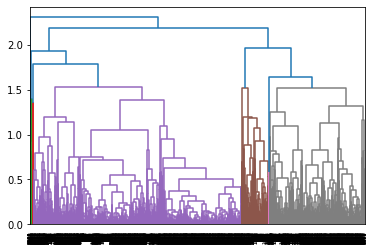

In [10]:
dendrogram = sch.dendrogram(sch.linkage(df_norm, method = "complete"))

In [11]:
hc = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage= 'complete')

In [12]:
hc.fit(df_norm)

AgglomerativeClustering(linkage='complete', n_clusters=5)

In [13]:
y_hc = hc.fit_predict(df_norm)

In [14]:
y_hc

array([0, 0, 0, ..., 2, 0, 0])

In [15]:
df['h_clusterid']= y_hc
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1


In [16]:
df1 = df.sort_values('h_clusterid')
df1.iloc[:,[0,-1]]

,ID#,h_clusterid
0,1,0
2485,2504,0
2487,2506,0
2488,2507,0
2491,2510,0
...,...,...
940,951,4
3959,3982,4
3779,3802,4
1389,1403,4


# apply DBSCAN

In [17]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
data = df.values
sc = StandardScaler().fit(data)
x = sc.transform(data)
x

array([[-1.73512503e+00, -4.51140783e-01, -1.86298687e-01, ...,
         1.39545434e+00, -7.66919299e-01, -7.30291870e-01],
       [-1.73426342e+00, -5.39456874e-01, -1.86298687e-01, ...,
         1.37995704e+00, -7.66919299e-01, -7.30291870e-01],
       [-1.73340181e+00, -3.20031232e-01, -1.86298687e-01, ...,
         1.41192021e+00, -7.66919299e-01, -7.30291870e-01],
       ...,
       [ 1.72682006e+00, -4.29480975e-05, -1.86298687e-01, ...,
        -1.31560393e+00,  1.30391816e+00,  1.39443508e+00],
       [ 1.72768167e+00, -1.85606976e-01, -1.86298687e-01, ...,
        -1.31608822e+00, -7.66919299e-01, -7.30291870e-01],
       [ 1.72854328e+00, -7.00507951e-01, -1.86298687e-01, ...,
        -1.31754109e+00, -7.66919299e-01, -7.30291870e-01]])

In [18]:
dbscan = DBSCAN(eps=2,min_samples=13)
dbscan.fit(x)
dbscan.labels_


array([0, 0, 0, ..., 1, 0, 0])

In [19]:
data1 = df.copy()
data1["cluster"] = dbscan.labels_
data1.groupby(data1["cluster"]).mean()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
cluster,,,,,,,,,,,,,
-1,1726.635088,212503.649123,1484.635088,2.666667,1.150877,1.17193,45555.698246,24.673684,3040.049123,8.824561,4707.357895,0.747368,1.382456
0,2177.786508,57488.055944,32.091320,1.695187,1.000000,1.00000,9753.425339,8.864253,183.345537,0.543398,3810.395311,0.000000,0.000000
1,1761.958991,73687.976341,59.289432,2.634069,1.000000,1.00000,25026.826498,13.896688,415.406940,1.302050,4585.642744,1.000000,1.809937
2,2453.933333,38556.733333,0.000000,1.000000,2.000000,1.00000,8951.533333,12.933333,60.000000,0.400000,3390.400000,0.000000,4.000000


In [20]:
data1["cluster"].value_counts()

 0    2431
 1    1268
-1     285
 2      15
Name: cluster, dtype: int64

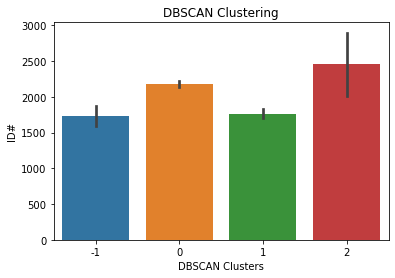

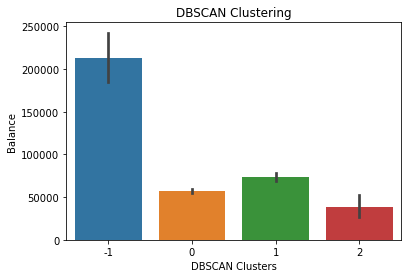

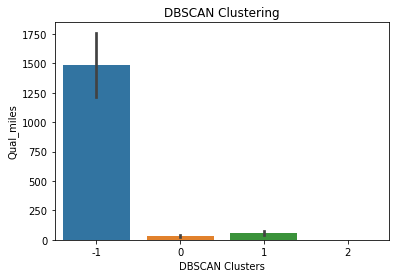

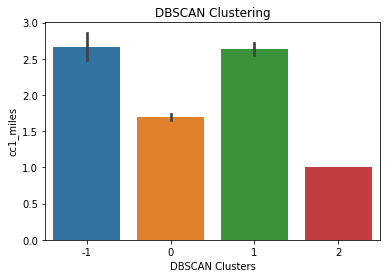

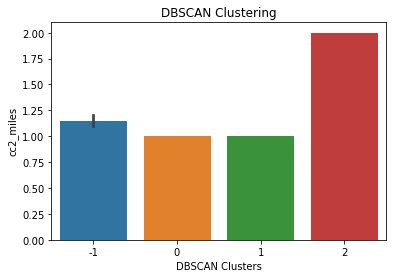

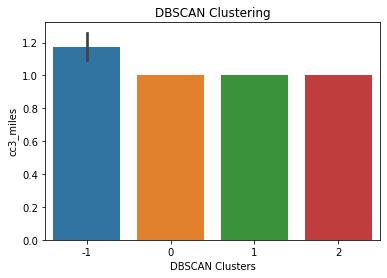

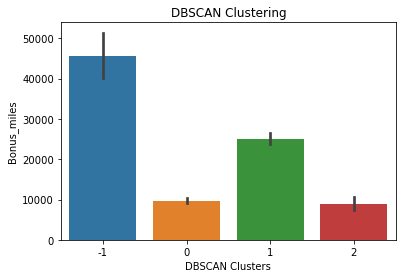

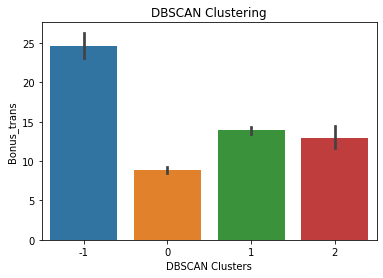

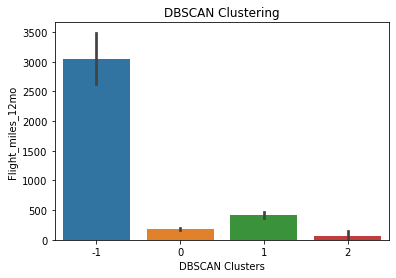

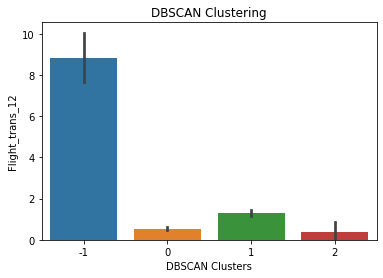

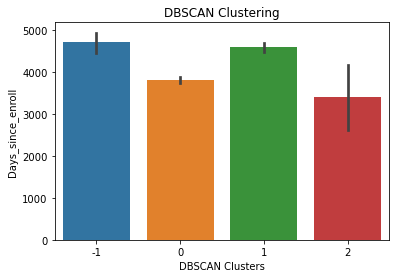

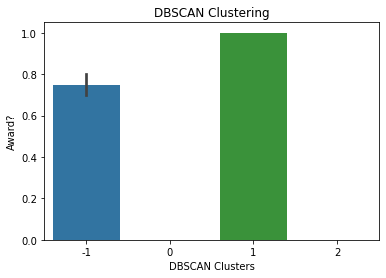

In [21]:
for i in range(0,12):
    sns.barplot(y=data1.iloc[:,i],x=data1["cluster"])
    plt.xlabel("DBSCAN Clusters")
    plt.ylabel(data1.columns[i])
    plt.title(f"DBSCAN Clustering")
    plt.show()

# Method2: KMeans Clustering

In [22]:
from sklearn.cluster import KMeans
data2 = df.copy()
data2.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1


In [23]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return(x)
df_norm = norm_func(data2)
df_norm

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
0,0.000000,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0,0.00
1,0.000249,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0,0.00
2,0.000498,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0,0.00
3,0.000746,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0,0.00
4,0.000995,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0,0.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,0.999005,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0,0.50
3995,0.999254,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0,0.50
3996,0.999502,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0,0.50
3997,0.999751,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0,0.00


Text(0, 0.5, 'wcss')

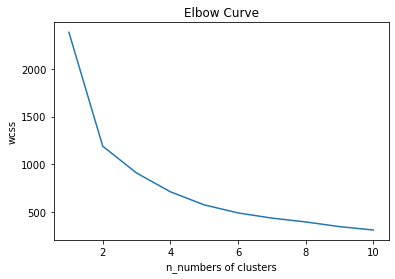

In [24]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_norm)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title("Elbow Curve")
plt.xlabel("n_numbers of clusters")
plt.ylabel("wcss")

In [25]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(df_norm)
kmeans.labels_

array([4, 4, 4, ..., 1, 0, 0], dtype=int32)

In [26]:
data2["clusters"] = kmeans.labels_
data2.groupby(data2['clusters']).mean()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
clusters,,,,,,,,,,,,,
0,3219.702070,35385.638164,94.610261,1.204320,1.017102,1.006301,4400.907291,6.941494,214.288029,0.598560,1983.927093,0.0,0.050405
1,2065.250630,77957.366499,273.720403,1.438287,1.027708,1.002519,10591.069270,11.361461,924.275819,2.802267,4071.128463,1.0,2.015113
2,1628.158379,125899.655617,68.941068,3.664825,1.001842,1.025783,33035.488029,17.337017,225.740331,0.655617,4793.812155,0.0,0.000000
3,1376.148472,119122.882096,201.451237,4.075691,1.001456,1.036390,50072.212518,20.892285,780.326055,2.365357,5265.270742,1.0,1.526929
4,1169.978009,49674.980324,90.319444,1.118056,1.017361,1.001157,3386.160880,6.824074,242.075231,0.719907,5570.855324,0.0,0.050926


In [27]:
data2['clusters'].value_counts()


0    1111
4     864
1     794
3     687
2     543
Name: clusters, dtype: int64